### Business Context
Predict whether a transaction is fraudulent so that the company can proactively stop suspicious behavior.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Fraud.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### EDA (Exploratory Data Analysis)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [6]:
data["isFraud"].value_counts()

isFraud
0    1047433
1       1142
Name: count, dtype: int64

In [ ]:
data.isnull().sum() # No missing values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

##### In the given dataset we must not remove outliers as they are the strongest fraud signal. Extreme transaction amounts may indicate fraud.

<Axes: ylabel='amount'>

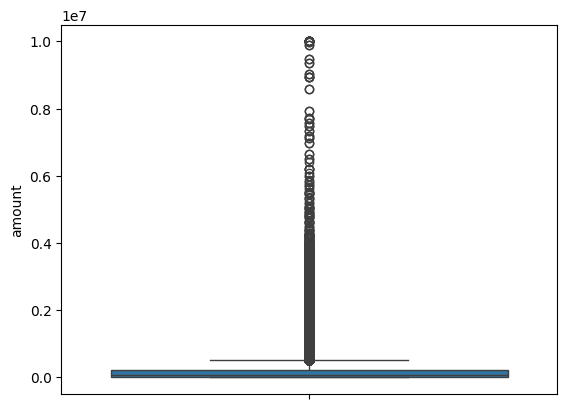

In [8]:
sns.boxplot(data["amount"])

In [9]:
data["isFraud"].value_counts()

isFraud
0    1047433
1       1142
Name: count, dtype: int64

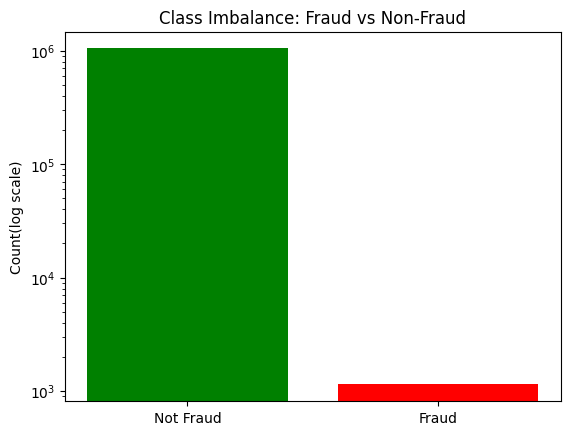

In [10]:
plt.bar(["Not Fraud","Fraud"],list(data["isFraud"].value_counts().values),color=['g','r'])
plt.yscale("log")
plt.title("Class Imbalance: Fraud vs Non-Fraud")
plt.ylabel("Count(log scale)")
plt.show()

In [11]:
data["type"].value_counts().values

array([373641, 353873, 227130,  86753,   7178])

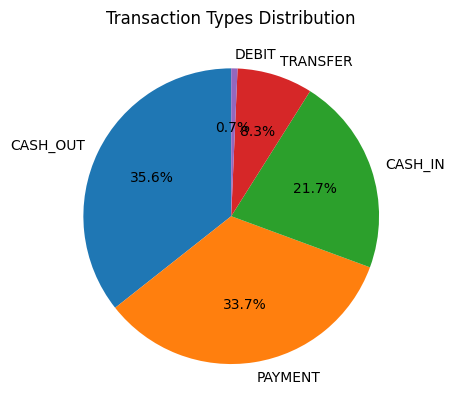

In [12]:
# plot pie chart of transaction types
counts = data["type"].value_counts()
plt.pie(counts.values, labels=counts.keys(), autopct='%1.1f%%', startangle=90)
plt.title("Transaction Types Distribution")
plt.show()

In [13]:
fraud_data=data[data["isFraud"]==1]

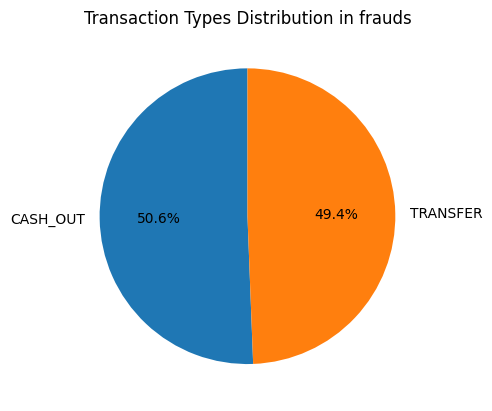

In [14]:
counts = fraud_data["type"].value_counts()
plt.pie(counts.values, labels=counts.keys(), autopct='%1.1f%%', startangle=90)
plt.title("Transaction Types Distribution in frauds")
plt.show()

### Feature Engineering

In [15]:
errorBalanceOrig = abs(data["oldbalanceOrg"] - data["newbalanceOrig"] - data["amount"])
errorBalanceOrig[0:5]

0    1.455192e-11
1    1.136868e-12
2    0.000000e+00
3    0.000000e+00
4    0.000000e+00
dtype: float64

In [16]:
errorBalanceOrig.describe()

count    1.048575e+06
mean     1.784666e+05
std      2.812390e+05
min      0.000000e+00
25%      1.518460e+03
50%      6.748902e+04
75%      2.508190e+05
max      6.388051e+06
dtype: float64

(array([163841.,  56239.,  22116.,   9356.,   4536.,   4166.,   1654.,
           698.]),
 array([ 250000.,  500000.,  750000., 1000000., 1250000., 1500000.,
        2000000., 2500000., 3000000.]),
 <BarContainer object of 8 artists>)

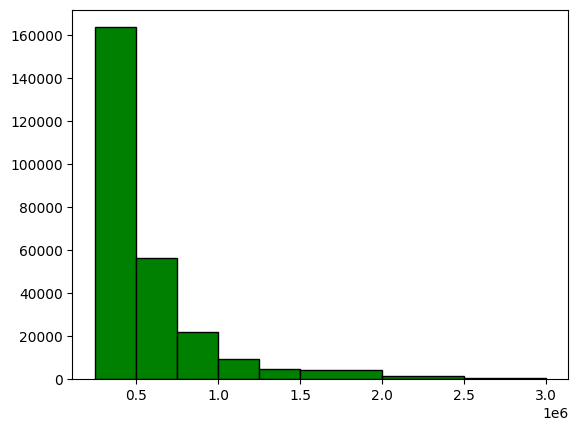

In [17]:
bins=[250000,500000,750000,1000000,1250000,1500000,2000000,2500000,3000000]
plt.hist(errorBalanceOrig,bins,edgecolor='black',color='green')

In [18]:
errorBalanceDest=data["oldbalanceDest"]+data["amount"]-data["newbalanceDest"]
errorBalanceDest[0:5]

0     9839.64
1     1864.28
2      181.00
3    21363.00
4    11668.14
dtype: float64

## Model

In [19]:
x=data.iloc[:,list(range(0,3))+list(range(4,6))+list(range(7,9))]
y=data[["isFraud"]]

In [20]:
x=pd.get_dummies(x,drop_first=True)
x_columns=x.columns

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [22]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfg=RandomForestClassifier()

In [24]:
rfg.fit(x_train,y_train)

c:\Users\Achintya Srivastawa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [25]:
y_pred=rfg.predict(x_test)

In [26]:
input={
    "step":1,
    "type":"PAYMENT",
    "amount":9839.64,
    "oldbalanceOrg":170136,
    "newbalanceOrig":160296.36,
    "oldbalanceDest":0,
    "newbalanceDest":0
}

In [27]:
input_df = pd.DataFrame([input])

In [34]:
input=pd.get_dummies(input_df)
input=input_df.reindex(columns=x_columns,fill_value=0)
input=st.transform(input)
Prediction=rfg.predict(input)

In [40]:
if Prediction[0]==0:
    print("Not Fraud")
else:
    print("Fraud")

Not Fraud


## Model evaluation

Demonstrating the performance of the model by using best set of tools

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
confusion_matrix(y_test,y_pred,labels=[1,0])

array([[   280,     64],
       [     6, 314223]])

In [43]:
print(accuracy_score(y_pred,y_test))
print(recall_score(y_pred,y_test))
print(f1_score(y_pred,y_test))

0.9997774761343154
0.9790209790209791
0.8888888888888888


### Fraud Detection Model Description  
The fraud detection problem was formulated as a binary classification task, where each transaction is classified as either fraudulent or non-fraudulent. The target variable used was isFraud.

A Random Forest Classifier was selected as the primary model for this task. Random Forest is an ensemble learning method that builds multiple decision trees using bootstrapped samples of the data and aggregates their predictions through majority voting. This approach helps in reducing overfitting and improves generalization performance.

The model is particularly well-suited for this problem because fraud detection involves non-linear relationships and complex interactions between variables such as transaction amount, account balances, and transaction type. Random Forest can naturally capture these patterns without requiring explicit feature transformations.

Categorical variables such as transaction type were converted into numerical format using one-hot encoding, while numerical features such as transaction amount and account balances were scaled using standardization for consistency in preprocessing.

The dataset was split into training and testing sets to evaluate model performance on unseen data. Due to the highly imbalanced nature of fraud data, model evaluation was performed using metrics beyond accuracy, such as precision, recall, and confusion matrix analysis, to ensure effective detection of fraudulent transactions.

Overall, the Random Forest model provides a robust and interpretable framework for identifying fraudulent behavior while maintaining flexibility to adapt to complex transaction patterns.

### Variable Selection Approach
Variables were selected based on domain relevance and exploratory data analysis. Transaction-related features (step, type, amount) and balance-related features (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest) were included as they capture abnormal fund movements typical of fraud. Unique customer identifiers (nameOrig, nameDest), were excluded to avoid unnecessary noise and overfitting.

Categorical variables were one-hot encoded, while unique identifiers were excluded as they do not contribute meaningful predictive information.

### Q. Key factors predicting fraud
Transaction type (TRANSFER, CASH_OUT)  
High transaction amount  
Sudden balance drain  
Destination accounts with zero balance before

### Q. Do these factors make sense?
Yes, these factors do make sense from a real-world fraud perspective. Fraudulent transactions are heavily concentrated in TRANSFER and CASH_OUT types, which aligns with the typical behavior of fraudsters attempting to quickly move and withdraw stolen funds. Additionally, unusually high transaction amounts and sudden balance depletion are logical indicators of account compromise rather than normal customer behavior.

### Q. Prevention strategies  
Real-time transaction limits  
Step-up authentication for risky transactions  
Velocity checks
Network-based monitoring

### Q. How to measure success?

Fraud loss reduction  
Precision-Recall trend  
False positive rate  
Customer complaints